In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df_employee=pd.read_csv("empl.csv")
df_employee.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


In [3]:
def missing_values_table(df_employee):
        zero_val = (df_employee == 0.00).astype(int).sum(axis=0)
        mis_val = df_employee.isnull().sum()
        mis_val_percent = 100 * df_employee.isnull().sum() / len(df_employee)
        
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Missing Values'})
        mz_table['Attributes'] = df_employee.nunique()
        mz_table['Data Type'] = df_employee.dtypes
        
        mz_table = mz_table.sort_values('% of Total Missing Values', ascending=True).round(1)
        
        print ("Your selected dataframe has " + str(df_employee.shape[1]) + " columns and " + str(df_employee.shape[0]) + " Rows.\n"      
               )

        return mz_table

missing_values_table(df_employee)

Your selected dataframe has 6 columns and 22 Rows.



,Zero Values,Missing Values,% of Total Missing Values,Attributes,Data Type
SNo,0,0,0.0,22,int64
Name,0,0,0.0,14,object
Country,0,0,0.0,5,object
Age,0,3,13.6,11,float64
City,0,3,13.6,10,object
Salary,0,3,13.6,13,float64


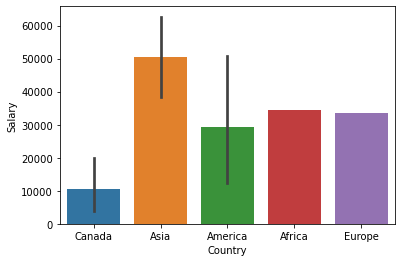

In [4]:
#lets do some graphical analysis
import seaborn as sns
import matplotlib.pyplot as plt
#lets draw bar graph which shows average salary in each country
sns.barplot(x="Country",y="Salary",data=df_employee)
plt.show()

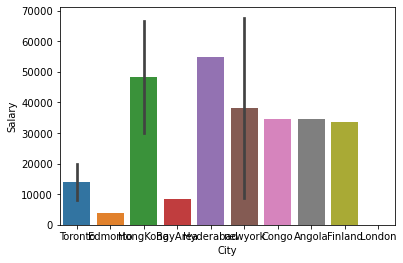

In [5]:
#let's plot the bar graph between city and salary
sns.barplot(x="City",y="Salary",data=df_employee)
plt.show()

In [6]:
#Now lets impute the null values in columns Age,City and Salary as found above
#For salary we will impute by groupping the cities
col_to_impute=["Age","City"]
for col in col_to_impute:
    if df_employee[col].dtype!="object":
        df_employee[col].fillna(df_employee[col].mean(),inplace=True)
    else:
        df_employee[col].fillna(df_employee[col].mode()[0],inplace=True)
        

In [7]:
#lets again check the null values
df_employee.isnull().sum()
#Only salary column is left which we will impute my taking mean of salaries belonging to same city

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     3
dtype: int64

In [8]:
df_employee[(df_employee.Salary.isnull())]

,SNo,Name,Age,City,Country,Salary
4,5,kamal,30.0,HongKong,America,NaN
17,19,Lee,31.0,Edmonto,Canada,NaN
21,23,Kiara,27.0,London,Europe,NaN


In [9]:
df_slry_grpby_city=df_employee.groupby(["City"]).agg({"Salary":"mean"})

In [10]:
df_slry_grpby_city

,Salary
City,
Angola,34534.000000
BayArea,8300.000000
Congo,34432.000000
Edmonto,3900.000000
Finland,33451.000000
HongKong,39333.666667
Hyderabad,54666.000000
London,NaN
Toronto,14000.000000


In [11]:
df_employee[(df_employee['City']=='London')]

,SNo,Name,Age,City,Country,Salary
21,23,Kiara,27.0,London,Europe,NaN


In [12]:
for index in df_slry_grpby_city.index:
    df_employee.loc[df_employee["City"]==index,["Salary"]]=df_employee.loc[df_employee["City"]==index,["Salary"]].fillna(df_slry_grpby_city.loc[index])

In [13]:
#lets again check the null values
df_employee.isnull().sum()
#one value is left as single instance of that city was there and it was nan so for that we will direcly take mean of salary column

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     1
dtype: int64

In [14]:
#imputing last null value in salary column as mentioned above
df_employee["Salary"].fillna(df_employee["Salary"].mean(),inplace=True)

In [15]:
#again checking the null values
df_employee.isnull().sum()
#All null values we have imputed

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     0
dtype: int64

In [16]:
df_employee

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.000000,Toronto,Canada,20000.000000
1,2,Lee,31.000000,Edmonto,Canada,3900.000000
2,3,Dave,34.000000,Toronto,Canada,8000.000000
3,4,Anik,26.000000,HongKong,Asia,66672.000000
4,5,kamal,30.000000,HongKong,America,39333.666667
5,6,Geet,32.421053,HongKong,Asia,30007.000000
6,7,Steven,43.000000,BayArea,America,8300.000000
7,8,Ram,38.000000,Hyderabad,Asia,54666.000000
8,9,hari,50.000000,newyork,America,67666.000000
9,11,yami,32.421053,newyork,America,8888.000000


In [17]:
#S.no and Name column will do nothing in predicting salary so lets drop the columns
df_employee.drop(columns=["SNo","Name"],inplace=True)

In [18]:
df_employee

,Age,City,Country,Salary
0,28.000000,Toronto,Canada,20000.000000
1,31.000000,Edmonto,Canada,3900.000000
2,34.000000,Toronto,Canada,8000.000000
3,26.000000,HongKong,Asia,66672.000000
4,30.000000,HongKong,America,39333.666667
5,32.421053,HongKong,Asia,30007.000000
6,43.000000,BayArea,America,8300.000000
7,38.000000,Hyderabad,Asia,54666.000000
8,50.000000,newyork,America,67666.000000
9,32.421053,newyork,America,8888.000000


In [19]:
import numpy as np
for col in df_employee.columns:
    if df_employee[col].dtype!="object":
        print("column name : "+col+" and skewness is : ",df_employee[col].skew())
        if df_employee[col].skew() > 0.55:
            df_employee[col]=np.log1p(df_employee[col])

column name : Age and skewness is :  1.034731645219974
column name : Salary and skewness is :  0.3169751648063996


In [20]:
#lets check skewness again
df_employee.skew()
#In above cell df_employee[col].dtype!="object" is not required as skew function returns skewness for numeric columns

Age       0.527799
Salary    0.316975
dtype: float64

In [21]:
df_employee

,Age,City,Country,Salary
0,3.367296,Toronto,Canada,20000.000000
1,3.465736,Edmonto,Canada,3900.000000
2,3.555348,Toronto,Canada,8000.000000
3,3.295837,HongKong,Asia,66672.000000
4,3.433987,HongKong,America,39333.666667
5,3.509186,HongKong,Asia,30007.000000
6,3.784190,BayArea,America,8300.000000
7,3.663562,Hyderabad,Asia,54666.000000
8,3.931826,newyork,America,67666.000000
9,3.509186,newyork,America,8888.000000


In [22]:
#lets use pd.get_dummies function to convert categorical columns numeric form which machine can uderstand
df_employee_final=pd.get_dummies(df_employee,drop_first=True)

In [23]:
#dataset which machine can understand
df_employee_final.head()

,Age,Salary,City_BayArea,City_Congo,City_Edmonto,City_Finland,City_HongKong,City_Hyderabad,City_London,City_Toronto,City_newyork,Country_America,Country_Asia,Country_Canada,Country_Europe
0,3.367296,20000.000000,0,0,0,0,0,0,0,1,0,0,0,1,0
1,3.465736,3900.000000,0,0,1,0,0,0,0,0,0,0,0,1,0
2,3.555348,8000.000000,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3.295837,66672.000000,0,0,0,0,1,0,0,0,0,0,1,0,0
4,3.433987,39333.666667,0,0,0,0,1,0,0,0,0,1,0,0,0


In [24]:
#Lets seprate input and output
df_x=df_employee_final.drop(columns=["Salary"])
y=df_employee_final[["Salary"]]

In [25]:
#Lets use decision tree regressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [28]:
regr=DecisionTreeRegressor()
final_r_state=maxr2_score(regr,df_x,y)

max r2 score corresponding to  94  is  0.9846015257525766


In [27]:
from sklearn.ensemble import RandomForestRegressor
rtr = RandomForestRegressor()
final_r_state = maxr2_score(rtr,df_x,y)

max r2 score corresponding to  99  is  0.7508313780535548


In [29]:
#lets use other model KNN regressor
#for using KNN regressor we need to find best value of k lets use grid search for that
#Before using grid search we need to scale our input set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [30]:
#using grid search for optimal value of k in knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(1,15)}
knr = KNeighborsRegressor()
clf = GridSearchCV(knr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 10}

In [31]:
knr=KNeighborsRegressor(n_neighbors=10)
final_r_state=maxr2_score(knr,x,y)

max r2 score corresponding to  71  is  0.49408973672364065


In [32]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
final_r_state=maxr2_score(lnr,df_x,y)

max r2 score corresponding to  67  is  0.8794336644502183
